## Загрузка датасета

In [1]:
import pandas as pd
import numpy as np

In [2]:
FILE_TYPE = 'csv'
df_original = []
if FILE_TYPE == 'xlsx':
    HABR_DATASET_PATH = 'habr.xlsx'
    df_original = pd.read_excel(HABR_DATASET_PATH)
elif FILE_TYPE == 'csv':
    HABR_DATASET_PATH = 'vacancies_data.csv'
    df_original = pd.read_csv(HABR_DATASET_PATH, encoding='utf8')

In [3]:
df_original

,Ссылка на объявление,Дата размещения,Название,Зарплата от,Зарплата до,Валюта,Вакансия,Стаж,Требования,Город,Тип занятости,Можно удаленно,Описание,Работодатель,Ссылка на работодателя,Рейтинг,Офисы,Число сотрудников,Дата сбора данных
0,https://career.habr.com/vacancies/1000144781,2024-06-27 16:50:48,Архитектор серверной инфраструктуры,NaN,500000.0,₽,Архитектор программного обеспечения,Старший (Senior),JavaScript / Node.js / Python / Elasticsearch ...,Москва,Полный рабочий день,NaN,~~~ О компании и команде\nО нас: Амбициозная к...,Ваша кадровая служба,https://vks.agency,NaN,"Россия, Москва, ул. Атарбекова, д. 4",0.0,2024-07-01 23:06:03
1,https://career.habr.com/vacancies/1000139937,2024-06-28 10:40:49,Руководитель группы FI/CO/FM,NaN,NaN,NaN,Менеджер технической поддержки,NaN,SAP / ABAP,Москва,Полный рабочий день,True,~~~ О компании и команде\nМеждународная сеть м...,Fix Price,https://fix-price.ru/,NaN,"Россия, Москва, Щепкина, д.33",2.0,2024-07-01 23:06:03
2,https://career.habr.com/vacancies/1000143735,2024-06-04 16:24:59,Intern Project Manager,5000.0,25000.0,₽,Менеджер проекта,Стажёр (Intern),Управление проектами / Agile / Управление риск...,"Москва, Санкт-Петербург, Казань",Полный рабочий день,True,~~~ О компании и команде\nКомпания FedAG - быс...,FedAG,https://career.habr.com/companies/fedag,4.90,"Россия, Санкт-Петербург, Институтский переулок 5",1.0,2024-07-01 23:06:04
3,https://career.habr.com/vacancies/1000143869,2024-07-01 12:09:30,"Middle+ Backend (Node.js, TypeScript) Developer",210000.0,NaN,₽,Бэкенд разработчик,Средний (Middle),Node.js / TypeScript / MongoDB / Redis,NaN,Полный рабочий день,True,~~~ О компании и команде\nОптимакрос – крупный...,Optimacros,https://optimacros.com,NaN,"Россия, Москва, Дмитровское шоссе, 81",0.0,2024-07-01 23:06:04
4,https://career.habr.com/vacancies/1000144076,2024-06-25 19:33:45,Системный аналитик,NaN,NaN,NaN,Системный аналитик,NaN,SQL / REST,NaN,NaN,True,~~~ О компании и команде\nОбязанности: Наша ко...,IBS,http://www.ibs.ru/,4.38,"Россия, Омск, ул. Маяковского, 74А\nРоссия, Ша...",12.0,2024-07-01 23:06:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,https://career.habr.com/vacancies/1000144598,2024-06-26 11:03:21,Ведущий программист 1C,NaN,250000.0,₽,Программист 1С,Старший (Senior),Разработка под 1С,NaN,Полный рабочий день,True,"~~~ О компании и команде\nКрафтье Компания """" ...",Bullevie,https://bullevie.ru/,NaN,"Россия, Санкт-Петербург, гп.Федоровское, ул.Пр...",0.0,2024-07-01 23:23:50
3195,https://career.habr.com/vacancies/1000143341,2024-06-25 17:01:12,Software Architect (NGFW),NaN,NaN,NaN,Архитектор программного обеспечения,NaN,Разработка программного обеспечения / Проектир...,NaN,NaN,True,~~~ О компании и команде\nNext Generation Fire...,Лаборатория Касперского,https://kaspersky.ru/,4.20,"Россия, Москва, Ленинградское ш., д. 39А, стр....",7.0,2024-07-01 23:23:50
3196,https://career.habr.com/vacancies/1000144180,2024-06-28 14:36:00,Data Center Infrastructure Engineer / Инженер ...,NaN,NaN,NaN,Системный администратор,Средний (Middle),Администрирование Linux / Bash / Osi model,Санкт-Петербург,Полный рабочий день,NaN,~~~ О компании и команде\nYADRO — это российск...,YADRO,https://yadro.com,NaN,"Россия, Москва, ул. Рочдельская, д. 15, стр. 1...",5.0,2024-07-01 23:23:50
3197,https://career.habr.com/vacancies/1000141715,2024-07-01 12:23:49,Ведущий инженер OpenStack,NaN,NaN,NaN,Инженер по доступности сервисов,Старший (Senior),Linux / Ansible / Terraform,Москва,Полный рабочий день,NaN,~~~ О компании и команде\nМы привлекаем амбици...,Cloud.ru,https://cloud.ru,4.75,"Россия, Москва, ул. 2-я Звенигородская, д. 28",4.0,2024-07-01 23:23:51


In [4]:
df_original.isna().sum()

Ссылка на объявление         0
Дата размещения              0
Название                     0
Зарплата от               2667
Зарплата до               2818
Валюта                    2543
Вакансия                     0
Стаж                       756
Требования                   0
Город                     1075
Тип занятости              339
Можно удаленно            1194
Описание                     0
Работодатель                94
Ссылка на работодателя      94
Рейтинг                   1217
Офисы                      406
Число сотрудников           94
Дата сбора данных            0
dtype: int64

In [5]:
valide_cols = [
    'Дата размещения',
    'Вакансия',
    'Стаж',
    'Зарплата от',
    'Зарплата до',
    'Город',
    'Дата сбора данных',
    'Число сотрудников',
    'Тип занятости',
    'Можно удаленно',
]
def get_valide_cols(dataset, cols):
    return dataset[cols]

In [6]:
exchange_rate_template = {
    "₽": 1,
    "$": 92.37,
    "€": 99.53,
    "₸": 0.206
}
def apply_exchange_rate(row, template=exchange_rate_template):
    row["Зарплата от"] = row["Зарплата от"] * exchange_rate_template[row["Валюта"]] if pd.notna(row["Зарплата от"]) else np.nan
    row["Зарплата до"] = row["Зарплата до"] * exchange_rate_template[row["Валюта"]] if pd.notna(row["Зарплата до"]) else np.nan
    return row

In [7]:
def get_difference_percentiles(df):
    filtered_df = df.dropna(subset=['Зарплата от', 'Зарплата до']).copy()
    filtered_df['Разница'] = filtered_df['Зарплата до'] - filtered_df['Зарплата от']
    condition = filtered_df['Разница'] > 0.8 * filtered_df['Зарплата до']
    filtered_df.loc[condition, ['Зарплата от', 'Разница']] = np.nan

    filtered_df = filtered_df.dropna(subset=['Зарплата от', 'Зарплата до'])

    filtered_df = filtered_df[filtered_df['Зарплата от'] >= 1000]
    filtered_df = filtered_df[filtered_df['Зарплата до'] >= 10000]

    filtered_df['Коэффициент разницы'] = np.where(filtered_df['Зарплата до'] != 0,
                                                      filtered_df['Разница'] / filtered_df['Зарплата до'],
                                                      np.nan)

    perc25 = filtered_df['Коэффициент разницы'].quantile(0.25)
    perc50 = filtered_df['Коэффициент разницы'].quantile(0.50)
    perc75 = filtered_df['Коэффициент разницы'].quantile(0.75)

    return perc25, perc50, perc75


def fill_na_salary(df, coef):
    result_df = df.copy()
    result_df['Зарплата до'] = result_df['Зарплата до'].fillna(result_df['Зарплата от'] / (1-coef))
    result_df['Зарплата от'] = result_df['Зарплата от'].fillna(result_df['Зарплата до'] * (1-coef))
    return result_df

In [8]:
import re

def separate_cities(df):
  work_df = df.copy()
  df_new = pd.DataFrame()
  for index in range(work_df.shape[0]):
    row = re.sub("[\(\[].*?[\)\]]", "", work_df['Город'].iloc[index])
    cities = [city.lstrip().rstrip() for city in row.split(',')]
    init_row = work_df.iloc[index].copy()
    for city in cities:
      new_row = init_row.copy()
      new_row['Город'] = city
      df_new = pd.concat([df_new, pd.DataFrame([new_row])], ignore_index=True)
  return df_new

def find_cities_around_threshold(df, threshold=75):
  cities = df['Город'].unique()
  ratios = {}
  for city in cities:
    ratios[city] = df['Город'].value_counts()[city]/df.shape[0]

  answer = []
  all_percentage = 0
  sorted_dict = {k: v for k, v in sorted(ratios.items(), key=lambda item: item[1], reverse=True)}
  for label, pct in sorted_dict.items():
      all_percentage += pct*100
      if all_percentage < threshold:
          answer.append(label)
  return answer

def create_new_cities(df, cities):
  df_new = df.copy()
  for index in range(df_new.shape[0]):
    if (df_new.iloc[index]['Город'] not in cities):
      df_new.at[index, 'Город'] = 'Малый город'
  return df_new

In [9]:
def fillna_experience_with_vacancy(df):
    dataset = df.copy()

    mean_wages = dataset.groupby(['Вакансия', 'Стаж']).agg({'Зарплата от': 'mean', 'Зарплата до': 'mean'}).reset_index()
    mean_wages['Средняя зарплата'] = (mean_wages['Зарплата от'] + mean_wages['Зарплата до']) / 2

    for i, row in dataset.iterrows():
        if pd.isna(row['Стаж']):
            min_wage = row['Зарплата от']
            max_wage = row['Зарплата до']
            avg_wage = (min_wage + max_wage) / 2
            vacancy_name = row['Вакансия']

            closest_experience = None
            smallest_diff = float('inf')
            for _, r in mean_wages[mean_wages['Вакансия'] == vacancy_name].iterrows():
                wage_diff = abs(avg_wage - r['Средняя зарплата'])
                if wage_diff < smallest_diff:
                    smallest_diff = wage_diff
                    closest_experience = r['Стаж']

            dataset.loc[i, "Стаж"] = closest_experience

    return dataset


def fillna_experience_with_wages(df):
    dataset = df.copy()

    mean_wages = dataset.groupby(['Стаж']).agg({'Зарплата от': 'mean', 'Зарплата до': 'mean'}).reset_index()
    mean_wages['Средняя зарплата'] = (mean_wages['Зарплата от'] + mean_wages['Зарплата до']) / 2

    for i, row in dataset.iterrows():
        if pd.isna(row['Стаж']):
            min_wage = row['Зарплата от']
            max_wage = row['Зарплата до']
            avg_wage = (min_wage + max_wage) / 2

            closest_experience = None
            smallest_diff = float('inf')
            for _, r in mean_wages.iterrows():
                wage_diff = abs(avg_wage - r['Средняя зарплата'])
                if wage_diff < smallest_diff:
                    smallest_diff = wage_diff
                    closest_experience = r['Стаж']

            dataset.loc[i, "Стаж"] = closest_experience

    return dataset

Удаляем строки, в которых одновременно отсутствует информация о зарплате в обоих столбцах. Заменяем пропуски нулями и делаем столбец категориальным. Заполняем столбец "Город"

In [10]:
def preprocessing_data(df):
   df_new = df.copy()

   missing_data = df_new[df["Зарплата от"].isnull() & df_new["Зарплата до"].isnull()]
   df_new = df_new.drop(missing_data.index)

   df_new['Можно удаленно'].fillna(0, inplace=True)
   df_new['Можно удаленно'] = df_new['Можно удаленно'].astype('int64')
   df_new['Можно удаленно'] = df_new['Можно удаленно'].apply(lambda x: "Да" if x == 1 else "Нет")

   df_new.loc[(df_new['Можно удаленно'] == "Нет") & (df_new['Город'].isnull()), 'Город'] = 'Не указано'
   df_new.loc[(df_new['Можно удаленно'] == "Да") & (df_new['Город'].isnull()), 'Город'] = 'Удаленно'

   df_new['Тип занятости'].fillna('Не указан', inplace=True)

   df_new['Число сотрудников'].fillna(0, inplace=True)
   df_new['Число сотрудников'] = df_new['Число сотрудников'].astype('int64')

   df_new = df_new.apply(apply_exchange_rate, axis=1)
   df_new.drop("Валюта", axis=1, inplace=True)

   perc25, perc50, perc75 = get_difference_percentiles(df_new)
   df_filled_salary = fill_na_salary(df_new, perc50)

   # df_exp = fillna_experience_with_vacancy(df_25)

   df_result = get_valide_cols(df_filled_salary, valide_cols)
   return df_result


def sep_cities_data(df):
    df_new = df.copy()

    df_new = separate_cities(df_new)
    # cities = find_cities_around_threshold(df_new, 85)
    # df_new = create_new_cities(df_new, cities)

    return df_new

In [11]:
df_prep = preprocessing_data(df_original)
# df_exp_vac = fillna_experience_with_vacancy(df_prep)
df_exp = fillna_experience_with_wages(df_prep) # fillna_experience_with_wages(df_exp_vac)
df_sep_cities = sep_cities_data(df_exp)

In [12]:
def analysis_missing_values_vacancy(df):
    data = df.copy()

    data['Наименьшая зарплата'] = data['Зарплата от']
    data['Наибольшая зарплата'] = data['Зарплата до']

    vacancy_missing_values = data['Стаж'].isnull().groupby(data['Вакансия']).mean()
    wages_values = data.groupby(['Вакансия', 'Стаж']).agg({'Зарплата от': 'mean',
                                                           'Зарплата до': 'mean',
                                                           'Наименьшая зарплата': 'min',
                                                           'Наибольшая зарплата': 'max'})

    return vacancy_missing_values[vacancy_missing_values > 0.15], wages_values

In [13]:
df_analysis, df_wages = analysis_missing_values_vacancy(df_prep)
df_analysis.sort_values()

Вакансия
Инженер технической поддержки          0.153846
ML разработчик                         0.166667
Архитектор программного обеспечения    0.166667
Менеджер по найму                      0.166667
Системный инженер                      0.166667
Бэкенд разработчик                     0.202614
Инженер по ручному тестированию        0.210526
Менеджер технической поддержки         0.250000
Инженер по производительности          0.333333
Инженер по компьютерному зрению        0.333333
Разработчик приложений                 0.400000
Менеджер по маркетингу                 0.500000
ERP-программист                        0.500000
Директор проекта                       0.500000
Технический директор                   0.500000
Директор по маркетингу                 1.000000
Менеджер по обеспечению качества       1.000000
Антифрод аналитик                      1.000000
Администратор сайта                    1.000000
Name: Стаж, dtype: float64

In [14]:
# from matplotlib import pyplot as plt

# plt.figure(figsize=(8, 8))
# plt.pie(df_analysis, labels=df_analysis.index, autopct='%1.1f%%', startangle=140)
# plt.axis('equal')  # Равные пропорции для круговой диаграммы
# plt.title('Доля пропущенных значений стажа по вакансиям')
# plt.show()

In [15]:
df_wages

Зарплата от    Зарплата до  \
Вакансия            Стаж                                             
DevOps-инженер      Младший (Junior)   93333.333333  171666.666667   
                    Средний (Middle)  201224.035088  302625.526316   
                    Стажёр (Intern)    40000.000000   60000.000000   
                    Старший (Senior)  366777.500000  505198.750000   
ERP-программист     Средний (Middle)  150000.000000  200000.000000   
...                                             ...            ...   
Фулстек разработчик Младший (Junior)   50000.000000  120000.000000   
                    Средний (Middle)  146406.877193  222743.868421   
                    Стажёр (Intern)    40000.000000   60000.000000   
                    Старший (Senior)  323355.000000  478573.277778   
Юрист               Старший (Senior)  100000.000000  150000.000000   

                                      Наименьшая зарплата  Наибольшая зарплата  
Вакансия            Стаж                                                        
DevOps-инженер      Младший (Junior)              60000.0             250000.0  
                    Средний (Middle)              50000.0             692775.0  
                    Стажёр (Intern)               40000.0              60000.0  
                    Старший (Senior)             250000.0             646590.0  
ERP-программист     Средний (Middle)             150000.0             200000.0  
...                                                   ...                  ...  
Фулстек разработчик Младший (Junior)              50000.0             120000.0  
                    Средний (Middle)              40000.0             450000.0  
                    Стажёр (Intern)               40000.0              60000.0  
                    Старший (Senior)             150000.0             671827.5  
Юрист               Старший (Senior)             100000.0             150000.0  

[153 rows x 4 columns]

In [16]:
df_analysis_uniq_exp = df_prep.groupby(['Вакансия'])['Стаж'].agg(['unique'])
df_analysis_uniq_exp

,unique
Вакансия,
DevOps-инженер,"[Старший (Senior), Средний (Middle), nan, Млад..."
ERP-программист,"[Средний (Middle), nan]"
HTML-верстальщик,[Средний (Middle)]
ML разработчик,"[Средний (Middle), nan, Стажёр (Intern), Старш..."
PR-менеджер,[Стажёр (Intern)]
...,...
Технический писатель,"[Средний (Middle), Старший (Senior), Стажёр (I..."
Ученый по данным,"[Стажёр (Intern), Старший (Senior)]"
Фронтенд разработчик,"[Средний (Middle), Младший (Junior), Старший (..."


In [17]:
filtered_df = df_analysis_uniq_exp[df_analysis_uniq_exp.apply(lambda x : len(x['unique']) <= 1, axis=1)]
filtered_df

,unique
Вакансия,
HTML-верстальщик,[Средний (Middle)]
PR-менеджер,[Стажёр (Intern)]
SMM-специалист,[Стажёр (Intern)]
Администратор защиты,[Средний (Middle)]
Администратор сайта,[nan]
Аналитик мобильных приложений,[Средний (Middle)]
Аналитик по обеспечению качества,[Средний (Middle)]
Аналитик продаж,[Средний (Middle)]
Аналитик технической поддержки,[Средний (Middle)]


In [18]:
filtered_df.shape

(25, 1)

In [19]:
df_anal = df_exp.copy()
df_anal['Наименьшая зарплата'] = df_anal['Зарплата от']
df_anal['Наибольшая зарплата'] = df_anal['Зарплата до']
df_anal.groupby(['Стаж']).agg({
    'Зарплата от': 'mean',
    'Зарплата до': 'mean',
    'Наименьшая зарплата': 'min',
    'Наибольшая зарплата': 'max'
})

,Зарплата от,Зарплата до,Наименьшая зарплата,Наибольшая зарплата
Стаж,,,,
Младший (Junior),75377.235507,120854.478261,36000.0,250000.0
Средний (Middle),155139.248036,230610.065657,38000.0,692775.0
Стажёр (Intern),44490.862069,70429.137931,5000.0,369480.0
Старший (Senior),272772.456853,409829.121827,92370.0,1492950.0


In [20]:
df_prep[df_prep['Вакансия'] == 'Инженер по производительности']

,Дата размещения,Вакансия,Стаж,Зарплата от,Зарплата до,Город,Дата сбора данных,Число сотрудников,Тип занятости,Можно удаленно
469,2024-07-01 12:27:12,Инженер по производительности,NaN,166666.666667,250000.0,Удаленно,2024-07-01 23:08:37,10,Полный рабочий день,Да
516,2024-07-01 19:27:15,Инженер по производительности,Старший (Senior),230000.000000,345000.0,Москва,2024-07-01 23:08:53,83,Полный рабочий день,Нет
2981,2024-06-28 11:42:14,Инженер по производительности,Старший (Senior),233333.333333,350000.0,Москва,2024-07-01 23:22:39,6,Полный рабочий день,Нет


In [21]:
df_exp[df_exp['Вакансия'] == 'Инженер по производительности']

,Дата размещения,Вакансия,Стаж,Зарплата от,Зарплата до,Город,Дата сбора данных,Число сотрудников,Тип занятости,Можно удаленно
469,2024-07-01 12:27:12,Инженер по производительности,Средний (Middle),166666.666667,250000.0,Удаленно,2024-07-01 23:08:37,10,Полный рабочий день,Да
516,2024-07-01 19:27:15,Инженер по производительности,Старший (Senior),230000.000000,345000.0,Москва,2024-07-01 23:08:53,83,Полный рабочий день,Нет
2981,2024-06-28 11:42:14,Инженер по производительности,Старший (Senior),233333.333333,350000.0,Москва,2024-07-01 23:22:39,6,Полный рабочий день,Нет


In [22]:
df_exp

,Дата размещения,Вакансия,Стаж,Зарплата от,Зарплата до,Город,Дата сбора данных,Число сотрудников,Тип занятости,Можно удаленно
0,2024-06-27 16:50:48,Архитектор программного обеспечения,Старший (Senior),333333.333333,500000.0,Москва,2024-07-01 23:06:03,0,Полный рабочий день,Нет
2,2024-06-04 16:24:59,Менеджер проекта,Стажёр (Intern),5000.000000,25000.0,"Москва, Санкт-Петербург, Казань",2024-07-01 23:06:04,1,Полный рабочий день,Да
3,2024-07-01 12:09:30,Бэкенд разработчик,Средний (Middle),210000.000000,315000.0,Удаленно,2024-07-01 23:06:04,0,Полный рабочий день,Да
8,2024-06-04 09:23:18,Менеджер по найму,Стажёр (Intern),66666.666667,100000.0,Удаленно,2024-07-01 23:06:06,0,Полный рабочий день,Да
18,2024-06-06 13:34:21,Менеджер технической поддержки,Средний (Middle),60000.000000,90000.0,Удаленно,2024-07-01 23:06:10,0,Полный рабочий день,Да
...,...,...,...,...,...,...,...,...,...,...
3153,2024-07-01 13:29:52,Веб-разработчик,Средний (Middle),200000.000000,300000.0,Москва,2024-07-01 23:23:36,0,Полный рабочий день,Нет
3160,2024-06-03 15:46:09,Фулстек разработчик,Стажёр (Intern),40000.000000,60000.0,Москва,2024-07-01 23:23:39,1,Неполный рабочий день,Да
3176,2024-06-26 13:17:01,DevOps-инженер,Старший (Senior),400000.000000,600000.0,Удаленно,2024-07-01 23:23:44,0,Полный рабочий день,Да
3181,2024-06-27 10:06:33,Фулстек разработчик,Старший (Senior),300000.000000,450000.0,Екатеринбург,2024-07-01 23:23:45,0,Полный рабочий день,Нет


<ipython-input-23-8f89aa1706c1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_exp, x='Зарплата от', y='Стаж', inner='box', palette='Dark2')


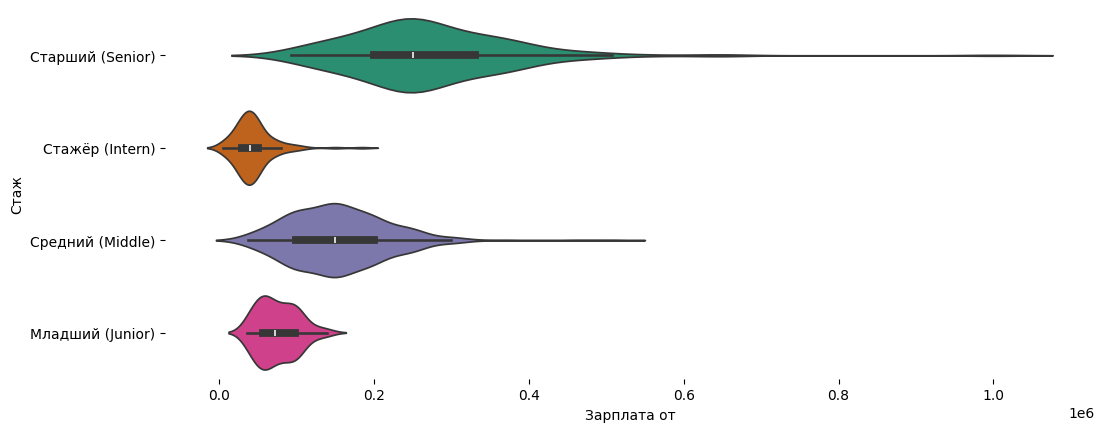

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_exp['Стаж'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_exp, x='Зарплата от', y='Стаж', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [24]:
df_sep_cities

,Дата размещения,Вакансия,Стаж,Зарплата от,Зарплата до,Город,Дата сбора данных,Число сотрудников,Тип занятости,Можно удаленно
0,2024-06-27 16:50:48,Архитектор программного обеспечения,Старший (Senior),333333.333333,500000.0,Москва,2024-07-01 23:06:03,0,Полный рабочий день,Нет
1,2024-06-04 16:24:59,Менеджер проекта,Стажёр (Intern),5000.000000,25000.0,Москва,2024-07-01 23:06:04,1,Полный рабочий день,Да
2,2024-06-04 16:24:59,Менеджер проекта,Стажёр (Intern),5000.000000,25000.0,Санкт-Петербург,2024-07-01 23:06:04,1,Полный рабочий день,Да
3,2024-06-04 16:24:59,Менеджер проекта,Стажёр (Intern),5000.000000,25000.0,Казань,2024-07-01 23:06:04,1,Полный рабочий день,Да
4,2024-07-01 12:09:30,Бэкенд разработчик,Средний (Middle),210000.000000,315000.0,Удаленно,2024-07-01 23:06:04,0,Полный рабочий день,Да
...,...,...,...,...,...,...,...,...,...,...
761,2024-07-01 13:29:52,Веб-разработчик,Средний (Middle),200000.000000,300000.0,Москва,2024-07-01 23:23:36,0,Полный рабочий день,Нет
762,2024-06-03 15:46:09,Фулстек разработчик,Стажёр (Intern),40000.000000,60000.0,Москва,2024-07-01 23:23:39,1,Неполный рабочий день,Да
763,2024-06-26 13:17:01,DevOps-инженер,Старший (Senior),400000.000000,600000.0,Удаленно,2024-07-01 23:23:44,0,Полный рабочий день,Да
764,2024-06-27 10:06:33,Фулстек разработчик,Старший (Senior),300000.000000,450000.0,Екатеринбург,2024-07-01 23:23:45,0,Полный рабочий день,Нет


In [25]:
df_exp.isna().sum()

Дата размещения      0
Вакансия             0
Стаж                 0
Зарплата от          0
Зарплата до          0
Город                0
Дата сбора данных    0
Число сотрудников    0
Тип занятости        0
Можно удаленно       0
dtype: int64

In [26]:
df_sep_cities.isna().sum()

Дата размещения      0
Вакансия             0
Стаж                 0
Зарплата от          0
Зарплата до          0
Город                0
Дата сбора данных    0
Число сотрудников    0
Тип занятости        0
Можно удаленно       0
dtype: int64

In [27]:
df_sep_cities['Город'].unique()

array(['Москва', 'Санкт-Петербург', 'Казань', 'Удаленно', 'Новый Уренгой',
       'Краснодар', 'Омск', 'Самара', 'Екатеринбург', 'Ростов-на-Дону',
       'Тюмень', 'Нижний Новгород', 'Липецк', 'Барнаул', 'Новосибирск',
       'Томск', 'Стерлитамак', 'Токио', 'Набережные Челны', 'Ставрополь',
       'Псков', 'Лимассол', 'Пенза', 'Саратов', 'Уфа', 'Кемерово',
       'Севастополь', 'Челябинск', 'Воронеж', 'Пушкино', 'Рязань',
       'Брянск', 'Хошимин', 'Ханой', 'Дананг', 'Пермь', 'Кострома',
       'Коломна', 'Таллин', 'Хабаровск', 'Калининград', 'Владивосток',
       'Тель-Авив', 'Красноярск', 'Симферополь', 'Астрахань', 'Иркутск',
       'Ханты-Мансийск', 'Сочи', 'Ижевск', 'Тольятти', 'Энгельс',
       'Майкоп', 'Химки', 'Бердск', 'Курган', 'Ярославль', 'Балашиха',
       'Зеленоград', 'Чебоксары', 'Ульяновск', 'Лос-Анджелес', 'Салехард',
       'Минск', 'Дубай', 'Донецк', 'Тула', 'Иваново', 'Комсомольск'],
      dtype=object)

In [28]:
# Эспорт общей и городской базы данных
df_exp.to_excel("habr_general.xlsx")
df_sep_cities.to_excel("habr_multicity.xlsx")

In [29]:
df_exp.groupby('Стаж').describe()

Зарплата от                                                   \
                       count           mean            std      min       25%   
Стаж                                                                            
Младший (Junior)        46.0   75377.235507   25501.675833  36000.0   56566.5   
Средний (Middle)       297.0  155139.248036   65469.871706  38000.0  100000.0   
Стажёр (Intern)        116.0   44490.862069   26267.884935   5000.0   30000.0   
Старший (Senior)       197.0  272772.456853  109946.316272  92370.0  200000.0   

                                                Зарплата до                 \
                       50%       75%        max       count           mean   
Стаж                                                                         
Младший (Junior)   71975.0   98092.5   140000.0        46.0  120854.478261   
Средний (Middle)  150000.0  200000.0   508035.0       297.0  230610.065657   
Стажёр (Intern)    40000.0   50000.0   184740.0       116.0   70429.137931   
Старший (Senior)  250000.0  330000.0  1000000.0       197.0  409829.121827   

                  ...                      Число сотрудников            \
                  ...       75%        max             count      mean   
Стаж              ...                                                    
Младший (Junior)  ...  150000.0   250000.0              46.0  3.478261   
Средний (Middle)  ...  285000.0   692775.0             297.0  4.811448   
Стажёр (Intern)   ...   80000.0   369480.0             116.0  0.887931   
Старший (Senior)  ...  480000.0  1492950.0             197.0  4.593909   

                                                       
                        std  min  25%  50%  75%   max  
Стаж                                                   
Младший (Junior)  12.448541  0.0  0.0  0.0  2.0  83.0  
Средний (Middle)  16.550439  0.0  0.0  0.0  2.0  83.0  
Стажёр (Intern)    2.365592  0.0  0.0  0.0  1.0  12.0  
Старший (Senior)  13.689992  0.0  0.0  0.0  4.0  83.0  

[4 rows x 24 columns]

In [30]:
df_outliers = df_exp[['Стаж', 'Зарплата от', 'Зарплата до']].copy()
df_outliers['Средняя зарплата'] = (df_outliers['Зарплата до'] + df_outliers['Зарплата до']) / 2
df_outliers['Разница'] = df_outliers['Зарплата до'] - df_outliers['Зарплата от']
df_outliers.drop(['Зарплата от', 'Зарплата до'], axis=1, inplace=True)
df_outliers

,Стаж,Средняя зарплата,Разница
0,Старший (Senior),500000.0,166666.666667
2,Стажёр (Intern),25000.0,20000.000000
3,Средний (Middle),315000.0,105000.000000
8,Стажёр (Intern),100000.0,33333.333333
18,Средний (Middle),90000.0,30000.000000
...,...,...,...
3153,Средний (Middle),300000.0,100000.000000
3160,Стажёр (Intern),60000.0,20000.000000
3176,Старший (Senior),600000.0,200000.000000
3181,Старший (Senior),450000.0,150000.000000


In [31]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import mahalanobis
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2


def simple_matching_distance(row, reference):
    return sum(row != reference)


def mahalanobis_distance(row, mean, inv_cov_matrix):
    return mahalanobis(row, mean, inv_cov_matrix)


In [32]:
data = df_outliers.copy()

data_exp_array = []
for experience_grade in data['Стаж'].unique():
    condition = data['Стаж'] == experience_grade
    numerical_data = data.loc[condition, ['Средняя зарплата', 'Разница']]
    mean = numerical_data.mean(axis=0)
    cov_matrix = np.cov(numerical_data.values.T)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    numerical_data['Махаланобис'] = numerical_data.apply(lambda row: mahalanobis_distance(row, mean, inv_cov_matrix), axis=1)
    data_exp_array += [numerical_data]

data['Махаланобис'] = pd.concat(data_exp_array)['Махаланобис']
combined_threshold = data['Махаланобис'].quantile(0.95)
data['Выброс'] = data['Махаланобис'] > combined_threshold

In [33]:
data[data['Выброс'] == True]['Стаж'].value_counts()

Стаж
Средний (Middle)    18
Старший (Senior)     7
Стажёр (Intern)      5
Младший (Junior)     3
Name: count, dtype: int64

In [34]:
data[data['Выброс'] == True]

,Стаж,Средняя зарплата,Разница,Махаланобис,Выброс
48,Старший (Senior),600000.0,350000.0,3.038306,True
66,Старший (Senior),831330.0,184740.0,3.582183,True
171,Средний (Middle),350000.0,50000.0,3.269010,True
197,Средний (Middle),280000.0,30000.0,2.918018,True
205,Стажёр (Intern),225000.0,75000.0,4.052218,True
234,Средний (Middle),500000.0,200000.0,3.398738,True
381,Старший (Senior),1200000.0,200000.0,7.108292,True
571,Младший (Junior),210000.0,70000.0,2.546281,True
700,Средний (Middle),300000.0,200000.0,4.807574,True
832,Стажёр (Intern),165000.0,55000.0,2.530830,True


In [35]:
df_cleaned = df_exp.drop(data.index[data['Выброс']])
df_out = df_exp.drop(df_cleaned.index)

In [36]:
df_cleaned

,Дата размещения,Вакансия,Стаж,Зарплата от,Зарплата до,Город,Дата сбора данных,Число сотрудников,Тип занятости,Можно удаленно
0,2024-06-27 16:50:48,Архитектор программного обеспечения,Старший (Senior),333333.333333,500000.0,Москва,2024-07-01 23:06:03,0,Полный рабочий день,Нет
2,2024-06-04 16:24:59,Менеджер проекта,Стажёр (Intern),5000.000000,25000.0,"Москва, Санкт-Петербург, Казань",2024-07-01 23:06:04,1,Полный рабочий день,Да
3,2024-07-01 12:09:30,Бэкенд разработчик,Средний (Middle),210000.000000,315000.0,Удаленно,2024-07-01 23:06:04,0,Полный рабочий день,Да
8,2024-06-04 09:23:18,Менеджер по найму,Стажёр (Intern),66666.666667,100000.0,Удаленно,2024-07-01 23:06:06,0,Полный рабочий день,Да
18,2024-06-06 13:34:21,Менеджер технической поддержки,Средний (Middle),60000.000000,90000.0,Удаленно,2024-07-01 23:06:10,0,Полный рабочий день,Да
...,...,...,...,...,...,...,...,...,...,...
3153,2024-07-01 13:29:52,Веб-разработчик,Средний (Middle),200000.000000,300000.0,Москва,2024-07-01 23:23:36,0,Полный рабочий день,Нет
3160,2024-06-03 15:46:09,Фулстек разработчик,Стажёр (Intern),40000.000000,60000.0,Москва,2024-07-01 23:23:39,1,Неполный рабочий день,Да
3176,2024-06-26 13:17:01,DevOps-инженер,Старший (Senior),400000.000000,600000.0,Удаленно,2024-07-01 23:23:44,0,Полный рабочий день,Да
3181,2024-06-27 10:06:33,Фулстек разработчик,Старший (Senior),300000.000000,450000.0,Екатеринбург,2024-07-01 23:23:45,0,Полный рабочий день,Нет


<ipython-input-37-842bd4772f49>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_cleaned, x='Зарплата от', y='Стаж', inner='box', palette='Dark2')


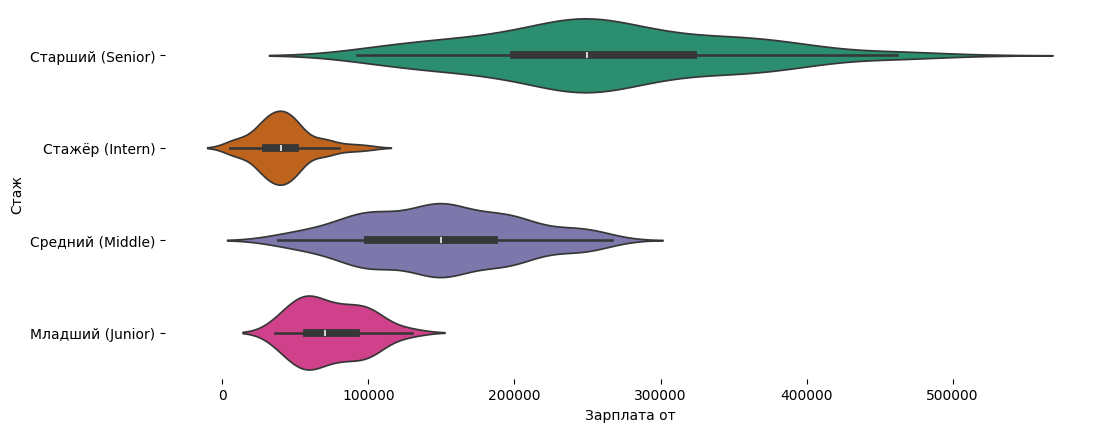

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_cleaned['Стаж'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_cleaned, x='Зарплата от', y='Стаж', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-38-311c41eb2a72>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_cleaned_plt, x='Средняя зарплата', y='Стаж', inner='box', palette='Dark2')


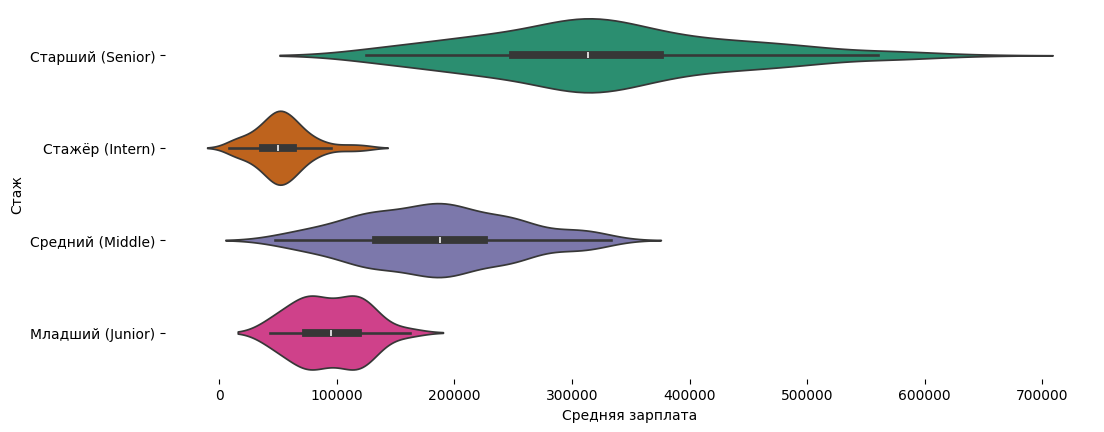

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_cleaned['Стаж'].unique()))
plt.figure(figsize=figsize)

df_cleaned_plt = df_cleaned.copy()
df_cleaned_plt['Средняя зарплата'] = (df_cleaned_plt['Зарплата от'] + df_cleaned_plt['Зарплата до']) / 2

sns.violinplot(df_cleaned_plt, x='Средняя зарплата', y='Стаж', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [39]:
df_out

,Дата размещения,Вакансия,Стаж,Зарплата от,Зарплата до,Город,Дата сбора данных,Число сотрудников,Тип занятости,Можно удаленно
48,2024-06-30 09:27:18,Разработчик мобильных приложений,Старший (Senior),250000.0,600000.0,Удаленно,2024-07-01 23:06:19,3,Полный рабочий день,Да
66,2024-07-01 13:34:02,Бэкенд разработчик,Старший (Senior),646590.0,831330.0,Удаленно,2024-07-01 23:06:26,0,Полный рабочий день,Да
171,2024-06-25 11:32:13,Бэкенд разработчик,Средний (Middle),300000.0,350000.0,Удаленно,2024-07-01 23:07:01,0,Полный рабочий день,Да
197,2024-06-25 16:47:25,Бэкенд разработчик,Средний (Middle),250000.0,280000.0,Удаленно,2024-07-01 23:07:11,1,Полный рабочий день,Да
205,2024-06-05 10:12:37,Менеджер по продажам,Стажёр (Intern),150000.0,225000.0,"Москва, Санкт-Петербург, Новосибирск",2024-07-01 23:07:14,0,Полный рабочий день,Нет
234,2024-06-30 08:09:25,Бэкенд разработчик,Средний (Middle),300000.0,500000.0,Удаленно,2024-07-01 23:07:22,0,Полный рабочий день,Да
381,2024-06-30 08:09:25,Бэкенд разработчик,Старший (Senior),1000000.0,1200000.0,Удаленно,2024-07-01 23:08:11,0,Полный рабочий день,Да
571,2024-06-27 13:54:55,Инженер по автоматизации тестирования,Младший (Junior),140000.0,210000.0,Москва,2024-07-01 23:09:12,6,Полный рабочий день,Нет
700,2024-06-05 21:47:36,Фулстек разработчик,Средний (Middle),100000.0,300000.0,Удаленно,2024-07-01 23:09:57,0,Неполный рабочий день,Да
832,2024-06-18 12:08:35,Инженер встраиваемых систем,Стажёр (Intern),110000.0,165000.0,Ростов-на-Дону,2024-07-01 23:10:43,0,Полный рабочий день,Да


<ipython-input-40-f5d64f52753b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_out_plt, x='Средняя зарплата', y='Стаж', inner='box', palette='Dark2')


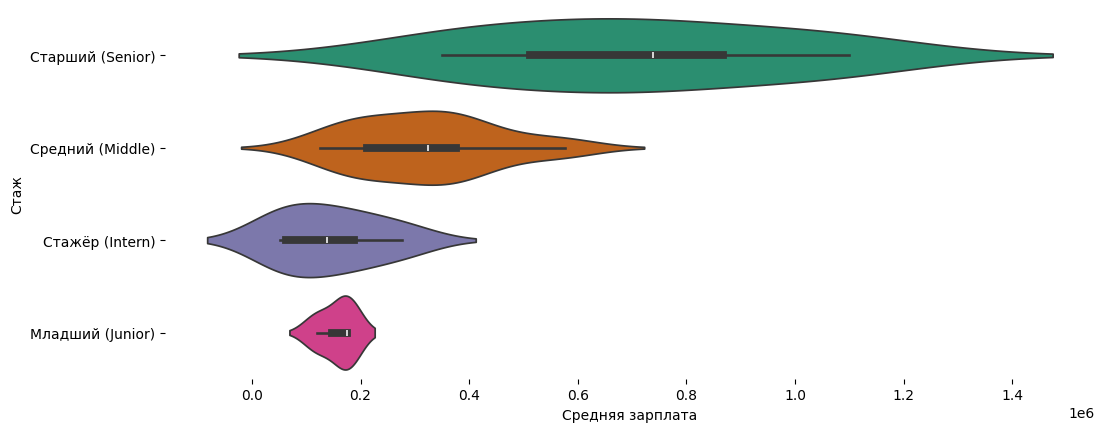

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_out['Стаж'].unique()))
plt.figure(figsize=figsize)

df_out_plt = df_out.copy()
df_out_plt['Средняя зарплата'] = (df_out_plt['Зарплата от'] + df_out_plt['Зарплата до']) / 2

sns.violinplot(df_out_plt, x='Средняя зарплата', y='Стаж', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [41]:
df_cleaned['Наименьшая зарплата'] = df_cleaned['Зарплата от']
df_cleaned['Наибольшая зарплата'] = df_cleaned['Зарплата до']
df_cleaned.groupby(['Стаж']).agg({
    'Зарплата от': 'mean',
    'Зарплата до': 'mean',
    'Наименьшая зарплата': 'min',
    'Наибольшая зарплата': 'max'
})

,Зарплата от,Зарплата до,Наименьшая зарплата,Наибольшая зарплата
Стаж,,,,
Младший (Junior),74124.484496,113937.348837,36000.0,195000.0
Средний (Middle),149021.475508,220121.109319,38000.0,400000.0
Стажёр (Intern),42037.837838,65137.837838,5000.0,150000.0
Старший (Senior),262848.021053,392811.247368,92370.0,762052.5


In [42]:
df_cleaned.drop(['Наименьшая зарплата', 'Наибольшая зарплата'], axis=1).groupby('Стаж').describe()

Зарплата от                                                  \
                       count           mean           std      min       25%   
Стаж                                                                           
Младший (Junior)        43.0   74124.484496  23484.382647  36000.0   57711.0   
Средний (Middle)       279.0  149021.475508  53631.175836  38000.0  100000.0   
Стажёр (Intern)        111.0   42037.837838  19732.079959   5000.0   30000.0   
Старший (Senior)       190.0  262848.021053  86270.024183  92370.0  200000.0   

                                                         Зарплата до  \
                       50%            75%            max       count   
Стаж                                                                   
Младший (Junior)   70000.0   91185.000000  130000.000000        43.0   
Средний (Middle)  150000.0  185703.333333  266666.666667       279.0   
Стажёр (Intern)    40000.0   50000.000000  100000.000000       111.0   
Старший (Senior)  250000.0  322471.250000  508035.000000       190.0   

                                 ...                     Число сотрудников  \
                           mean  ...       75%       max             count   
Стаж                             ...                                         
Младший (Junior)  113937.348837  ...  150000.0  195000.0              43.0   
Средний (Middle)  220121.109319  ...  270000.0  400000.0             279.0   
Стажёр (Intern)    65137.837838  ...   80000.0  150000.0             111.0   
Старший (Senior)  392811.247368  ...  450000.0  762052.5             190.0   

                                                                 
                      mean        std  min  25%  50%  75%   max  
Стаж                                                             
Младший (Junior)  3.581395  12.856780  0.0  0.0  0.0  2.0  83.0  
Средний (Middle)  4.480287  15.694205  0.0  0.0  0.0  2.0  83.0  
Стажёр (Intern)   0.927928   2.411004  0.0  0.0  0.0  1.0  12.0  
Старший (Senior)  4.747368  13.915823  0.0  0.0  0.0  4.0  83.0  

[4 rows x 24 columns]

In [43]:
df_out.groupby('Стаж').describe()

Зарплата от                                          \
                       count           mean            std       min   
Стаж                                                                   
Младший (Junior)         3.0   93333.333333   50332.229568   40000.0   
Средний (Middle)        18.0  249964.722222  132140.284574   50000.0   
Стажёр (Intern)          5.0   98948.000000   72500.575998   25000.0   
Старший (Senior)         7.0  542150.000000  269563.297947  200000.0   

                                                          Зарплата до  \
                       25%       50%       75%        max       count   
Стаж                                                                    
Младший (Junior)   70000.0  100000.0  120000.0   140000.0         3.0   
Средний (Middle)  112500.0  300000.0  300000.0   508035.0        18.0   
Стажёр (Intern)    25000.0  110000.0  150000.0   184740.0         5.0   
Старший (Senior)  373825.0  554220.0  646590.0  1000000.0         7.0   

                                 ...                       Число сотрудников  \
                           mean  ...        75%        max             count   
Стаж                             ...                                           
Младший (Junior)  220000.000000  ...   230000.0   250000.0               3.0   
Средний (Middle)  393188.888889  ...   450000.0   692775.0              18.0   
Стажёр (Intern)   187896.000000  ...   225000.0   369480.0               5.0   
Старший (Senior)  871742.857143  ...  1015665.0  1492950.0               7.0   

                                                                 
                      mean        std  min  25%  50%  75%   max  
Стаж                                                             
Младший (Junior)  2.000000   3.464102  0.0  0.0  0.0  3.0   6.0  
Средний (Middle)  9.944444  26.679960  0.0  0.0  0.0  1.0  83.0  
Стажёр (Intern)   0.000000   0.000000  0.0  0.0  0.0  0.0   0.0  
Старший (Senior)  0.428571   1.133893  0.0  0.0  0.0  0.0   3.0  

[4 rows x 24 columns]

## Обработка выбросов

In [44]:
def get_soft_bounds(grade, data):
    pass


def get_bounds(grade, data=None):
    # границы, предложенные Алексеем
    lower_bounds = {'Стажёр (Intern)': 1000,
                    'Младший (Junior)': 50000,
                    'Средний (Middle)': 120000,
                    'Старший (Senior)': 200000}

    upper_bounds = {'Стажёр (Intern)': 100000,
                    'Младший (Junior)': 150000,
                    'Средний (Middle)': 500000,
                    'Старший (Senior)': 1000000}

    lower_bound = lower_bounds[grade]
    upper_bound = upper_bounds[grade]

    return lower_bound, upper_bound

In [45]:
def apply_bounds(df):
    dataset = df.copy()
    outlier_indexes = []

    for index, row in dataset.iterrows():
        l_wage, u_wage = row['Зарплата от'], row['Зарплата до']
        l_bound, u_bound = get_bounds(row['Стаж'])
        if l_bound <= l_wage and u_wage <= u_bound:
            continue

        is_outlier = True
        for grade in dataset['Стаж'].unique():
            l_bound, u_bound = get_bounds(grade)
            if l_bound <= l_wage and u_wage <= u_bound:
                dataset.loc[index, 'Стаж'] = grade
                is_outlier = False
                break
        if is_outlier:
            outlier_indexes += [index]
            dataset.drop(index=index, inplace=True)

    return dataset, outlier_indexes

In [46]:
df_salaries_bounded, outlier_indexes = apply_bounds(df_exp)
df_salaries_bounded

,Дата размещения,Вакансия,Стаж,Зарплата от,Зарплата до,Город,Дата сбора данных,Число сотрудников,Тип занятости,Можно удаленно
0,2024-06-27 16:50:48,Архитектор программного обеспечения,Старший (Senior),333333.333333,500000.0,Москва,2024-07-01 23:06:03,0,Полный рабочий день,Нет
2,2024-06-04 16:24:59,Менеджер проекта,Стажёр (Intern),5000.000000,25000.0,"Москва, Санкт-Петербург, Казань",2024-07-01 23:06:04,1,Полный рабочий день,Да
3,2024-07-01 12:09:30,Бэкенд разработчик,Средний (Middle),210000.000000,315000.0,Удаленно,2024-07-01 23:06:04,0,Полный рабочий день,Да
8,2024-06-04 09:23:18,Менеджер по найму,Стажёр (Intern),66666.666667,100000.0,Удаленно,2024-07-01 23:06:06,0,Полный рабочий день,Да
18,2024-06-06 13:34:21,Менеджер технической поддержки,Стажёр (Intern),60000.000000,90000.0,Удаленно,2024-07-01 23:06:10,0,Полный рабочий день,Да
...,...,...,...,...,...,...,...,...,...,...
3153,2024-07-01 13:29:52,Веб-разработчик,Средний (Middle),200000.000000,300000.0,Москва,2024-07-01 23:23:36,0,Полный рабочий день,Нет
3160,2024-06-03 15:46:09,Фулстек разработчик,Стажёр (Intern),40000.000000,60000.0,Москва,2024-07-01 23:23:39,1,Неполный рабочий день,Да
3176,2024-06-26 13:17:01,DevOps-инженер,Старший (Senior),400000.000000,600000.0,Удаленно,2024-07-01 23:23:44,0,Полный рабочий день,Да
3181,2024-06-27 10:06:33,Фулстек разработчик,Старший (Senior),300000.000000,450000.0,Екатеринбург,2024-07-01 23:23:45,0,Полный рабочий день,Нет


In [51]:
df_salaries_bounded.groupby('Стаж').describe()

Зарплата от                                                   \
                       count           mean           std       min       25%   
Стаж                                                                            
Младший (Junior)        91.0   84526.170330  16871.323972   50000.0   71948.0   
Средний (Middle)       245.0  176069.767347  43022.684936  120000.0  150000.0   
Стажёр (Intern)        130.0   41442.774359  16699.051455    5000.0   30000.0   
Старший (Senior)       160.0  300219.691667  84151.998265  200000.0  244740.0   

                                                    Зарплата до  \
                            50%       75%       max       count   
Стаж                                                              
Младший (Junior)   90000.000000  100000.0  110000.0        91.0   
Средний (Middle)  166666.666667  200000.0  300000.0       245.0   
Стажёр (Intern)    40000.000000   50000.0   84000.0       130.0   
Старший (Senior)  270000.000000  350000.0  646590.0       160.0   

                                 ...                       Число сотрудников  \
                           mean  ...         75%       max             count   
Стаж                             ...                                           
Младший (Junior)  128626.604396  ...  150000.000  150000.0              91.0   
Средний (Middle)  260137.197959  ...  300000.000  500000.0             245.0   
Стажёр (Intern)    64118.730769  ...   80000.000  100000.0             130.0   
Старший (Senior)  444180.293750  ...  523149.375  831330.0             160.0   

                                                                 
                      mean        std  min  25%  50%  75%   max  
Стаж                                                             
Младший (Junior)  2.296703   9.014180  0.0  0.0  0.0  2.0  83.0  
Средний (Middle)  5.669388  18.096080  0.0  0.0  0.0  2.0  83.0  
Стажёр (Intern)   0.892308   2.303506  0.0  0.0  0.0  1.0  12.0  
Старший (Senior)  5.375000  15.031518  0.0  0.0  0.0  6.0  83.0  

[4 rows x 24 columns]

<ipython-input-47-200fddb00bd8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_salaries_bounded, x='Зарплата от', y='Стаж', inner='box', palette='Dark2')


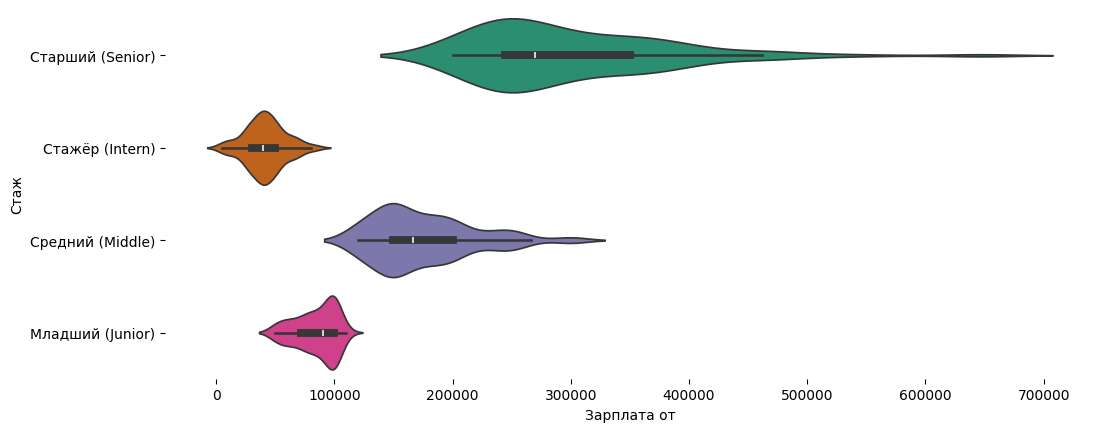

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_salaries_bounded['Стаж'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_salaries_bounded, x='Зарплата от', y='Стаж', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [48]:
df_outliers_salaries = df_exp.loc[outlier_indexes]
df_outliers_salaries

,Дата размещения,Вакансия,Стаж,Зарплата от,Зарплата до,Город,Дата сбора данных,Число сотрудников,Тип занятости,Можно удаленно
69,2024-06-14 17:46:10,Маркетинговый аналитик,Средний (Middle),105000.000000,157500.0,"Санкт-Петербург, Омск, Самара",2024-07-01 23:06:26,0,Полный рабочий день,Да
73,2024-06-05 09:34:31,Менеджер проекта,Средний (Middle),100000.000000,180000.0,Ростов-на-Дону,2024-07-01 23:06:28,0,Полный рабочий день,Нет
241,2024-06-27 12:03:50,Бэкенд разработчик,Средний (Middle),106666.666667,160000.0,Набережные Челны,2024-07-01 23:07:25,0,Полный рабочий день,Нет
356,2024-07-01 12:42:39,Бэкенд разработчик,Средний (Middle),100000.000000,160000.0,Удаленно,2024-07-01 23:08:03,0,Неполный рабочий день,Да
381,2024-06-30 08:09:25,Бэкенд разработчик,Старший (Senior),1000000.000000,1200000.0,Удаленно,2024-07-01 23:08:11,0,Полный рабочий день,Да
403,2024-06-26 15:54:12,Бэкенд разработчик,Средний (Middle),100000.000000,180000.0,Удаленно,2024-07-01 23:08:17,0,Полный рабочий день,Да
582,2024-06-24 14:26:17,Фулстек разработчик,Средний (Middle),100000.000000,200000.0,Коломна,2024-07-01 23:09:16,0,Полный рабочий день,Нет
700,2024-06-05 21:47:36,Фулстек разработчик,Средний (Middle),100000.000000,300000.0,Удаленно,2024-07-01 23:09:57,0,Неполный рабочий день,Да
751,2024-06-21 14:13:56,Фронтенд разработчик,Средний (Middle),110844.000000,166266.0,Удаленно,2024-07-01 23:10:18,0,Не указан,Да
803,2024-06-28 17:46:04,DevOps-инженер,Средний (Middle),116000.000000,174000.0,Удаленно,2024-07-01 23:10:34,10,Полный рабочий день,Да


In [50]:
df_outliers_salaries.groupby('Стаж').describe()

Зарплата от                                          \
                       count           mean            std       min   
Стаж                                                                   
Младший (Junior)         5.0   85466.666667   27253.542074   40000.0   
Средний (Middle)        19.0   97725.491228   15796.921748   50000.0   
Стажёр (Intern)          1.0  110000.000000            NaN  110000.0   
Старший (Senior)         5.0  359004.000000  397741.555322   92370.0   

                                                               Зарплата до  \
                       25%       50%            75%        max       count   
Стаж                                                                         
Младший (Junior)   80000.0  100000.0  103333.333333   104000.0         5.0   
Средний (Middle)  100000.0  100000.0  103303.500000   116000.0        19.0   
Стажёр (Intern)   110000.0  110000.0  110000.000000   110000.0         1.0   
Старший (Senior)  100000.0  105000.0  497650.000000  1000000.0         5.0   

                                 ...                       Число сотрудников  \
                           mean  ...        75%        max             count   
Стаж                             ...                                           
Младший (Junior)  186200.000000  ...   200000.0   250000.0               5.0   
Средний (Middle)  199079.263158  ...   200000.0   300000.0              19.0   
Стажёр (Intern)   165000.000000  ...   165000.0   165000.0               1.0   
Старший (Senior)  647038.000000  ...  1200000.0  1492950.0               5.0   

                                                                
                      mean       std  min  25%  50%  75%   max  
Стаж                                                            
Младший (Junior)  2.400000  4.335897  0.0  0.0  0.0  2.0  10.0  
Средний (Middle)  0.578947  2.292882  0.0  0.0  0.0  0.0  10.0  
Стажёр (Intern)   0.000000       NaN  0.0  0.0  0.0  0.0   0.0  
Старший (Senior)  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  

[4 rows x 24 columns]